In [74]:
import numpy as np
import sympy as sp
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

# M40006 In-Course Assessment

# 25 March 2021, 9-11 am

## Two Hours

### Answer all questions, submitting your answers as a single Jupyter notebook.

## Question 1: 35 marks

For an iterated map $f$ from the reals to the reals, the <b>Lyapunov exponent</b> is a measure of the tendency of iterations, whose starting values are close to one another, to diverge. It can be defined, for starting value $x=x_0$, as 

$$\lim_{n\to\infty}\frac{1}{n} \sum_{r=1}^n \log|f'(x_r)|,$$

where $x_0, x_1, x_2, \dots$ are iterates of the map. Positive values are associated with the phenomenon of <b>chaos</b>.

We're often interested in <em>families</em> of maps, with a variable parameter $k$; an interesting case is the logistic map,
$$f(x) = k\,x\,(1-x).$$

In practice, we can't usually let $n$ tend to infinity, so we truncate using fairly large $n$.

The following is a listing of a function called `lyapunov_exponent` which uses SymPy's `diff` function to calculate $f'$. It's built to work with families of maps: the arguments are `f`, the symbolic variables `x` and `k`, the parameter value `k_value`, the starting x-value `x0`, and the value of `n`, assumed to be a positive integer.

In [75]:
def lyapunov_exponent(f, x, k, k_value, x0, n):
    """Calculates an estimate for the Lyapunov exponent of the map f, 
    dependent on x and k, for a particular value k_value of k, starting
    x-value x0, and n iterations"""
    
    # initialize x_value and total
    x_value = x0
    total = 0
    
    # calculate derivative symbolically
    df = sp.diff(f, x)
    
    # for loop
    for r in range(n):
        # calculate next x_value
        x_value = float(f.subs([(x, x_value), (k, k_value)]))
        # increment total
        total += np.log(float(abs(df.subs([(x, x_value), (k, k_value)]))))
    
    # return estimate
    return total/n

(a) Define `x` and `k` as symbolic SymPy variables.

In [76]:
sp.init_printing()
x, k =sp.symbols('x k')

(b) Calculate
```python
lyapunov_exponent(k*x*(1-x), x, k, 2.5, 0.3, 100)
```
and show that it is negative.

In [77]:
sp.expand(lyapunov_exponent(k*x*(1-x), x, k, 2.5, 0.3, 100))

(c) Find a value of `k_value` between 0 and 4 for which

```python
lyapunov_exponent(k*x*(1-x), x, k, k_value, 0.3, 100)
```
is positive.

In [78]:
lyapunov_exponent(k*x*(1-x), x, k, 3.99, 0.3, 100)

(d) Define
```python
lyapunov_exponent_vec = np.vectorize(lyapunov_exponent)
```
and use it to calculate the "$n=100$" estimate of the Lyapunov exponent for parameter values $2.5, 2.6, 2.7, \dots, 4.0$

In [79]:
lyapunov_exponent_vec = np.vectorize(lyapunov_exponent)

print(lyapunov_exponent_vec(k*x*(1-x), x, k, np.arange(2.5, 4.1 , 0.1), 0.3, 100))

[-0.70593293 -0.51915103 -0.36273668 -0.2279469  -0.10983304 -0.01819869
 -0.2048762  -0.75793999 -0.49861599 -0.10838731 -0.71191421  0.17530515
  0.2953132   0.38314317  0.42080871  0.69518876]


(e) As you have probably spotted, using the `subs` method in this way is very inefficient. Write a version called `lyapunov_exponent2`, which instead uses functions `f_lamb` and `df_lamb` created using `lambdify`, with symbolic variables `x` and `k`. Make sure these functions work on NumPy arrays. 

(Hint: the correct definition of `f_lamb` is
```python
f_lamb = sp.lambdify((x, k), f, 'numpy')
```
)

Test your function by typing
```python
lyapunov_exponent2(k*x*(1-x), x, k, 2.5, 0.3, 100)
```

In [80]:
def lyapunov_exponent2(f, x, k, k_value, x0, n):
    """Calculates an estimate for the Lyapunov exponent of the map f, 
    dependent on x and k, for a particular value k_value of k, starting
    x-value x0, and n iterations"""
    
    # initialize x_value and total
    x_value = x0
    total = 0
    
    #creating lambda functions of f and it's derivative
    f_lamb = sp.lambdify((x, k), f, 'numpy')
    df_lamb = sp.lambdify((x, k), sp.diff(f, x), 'numpy')
    
    # for loop
    for r in range(n):
        # calculate next x_value
        x_value = f_lamb(x_value, k_value)
        # increment total
        total += np.log(np.abs(df_lamb(x_value, k_value)))
    
    # return estimate
    return total/n

print(lyapunov_exponent2(k*x*(1-x), x, k, 2.5, 0.3, 100))

-0.7059329347057702


(f) Calculate the "$n=1000$" estimate of the Lyapunov exponent for parameter values $2.50, 2.51, 2.52, \dots, 4.00$, and plot it against these parameter values.

[-0.69442576 -0.67455974 -0.65508406 -0.63598324 -0.61724279 -0.59884911
 -0.58078937 -0.56305151 -0.54562413 -0.52849642 -0.51165816 -0.49509967
 -0.47881174 -0.46278561 -0.44701297 -0.43148589 -0.4161968  -0.40113851
 -0.38630414 -0.3716871  -0.35728112 -0.34308018 -0.32907854 -0.31527067
 -0.3016513  -0.28821537 -0.27495801 -0.26187457 -0.24896057 -0.23621172
 -0.22362389 -0.21119312 -0.19891561 -0.18678771 -0.17480594 -0.16296694
 -0.15126753 -0.13970467 -0.1282755  -0.11697735 -0.10580777 -0.09476462
 -0.08384614 -0.07305117 -0.06237955 -0.05183294 -0.04141679 -0.03114573
 -0.02106262 -0.01134252 -0.00480833 -0.02052807 -0.04074385 -0.06244849
 -0.08549223 -0.10991711 -0.13582954 -0.16337729 -0.19274679 -0.22416769
 -0.25792235 -0.29436036 -0.33391985 -0.37715884 -0.42480244 -0.47781618
 -0.53752509 -0.60581708 -0.68551479 -0.78111627 -0.90045566 -1.05912294
 -1.29603833 -1.77369269 -1.98720684 -1.36403832 -1.09629266 -0.92303925
 -0.79438046 -0.69184766 -0.60690506 -0.53338965 -0

Text(0, 0.5, 'lyapunox exponent')

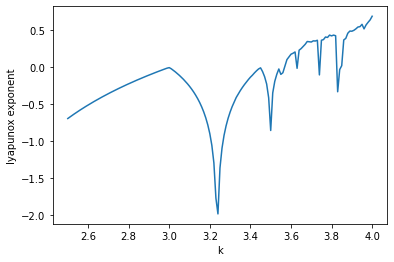

In [83]:
print(lyapunov_exponent2(k*x*(1-x), x, k, np.arange(2.5, 4.01 , 0.01), 0.3, 1000))

plt.plot(np.arange(2.5, 4.01, 0.01), lyapunov_exponent2(k*x*(1-x), x, k, np.arange(2.5, 4.01 , 0.01), 0.3, 1000))

plt.xlabel('k')
plt.ylabel('lyapunox exponent')

## Question 2: 65 marks

Here is a listing for a function called `partition`, which takes as its argument a list `data`, assumed to be numerical, and two values `indexlo` and `indexhi`. It then does the following.

<ul>
    <li>Data items with indexes less than <code>indexlo</code> or greater than <code>indexhi</code> are left alone.</li>
    <li>The data item with index <code>indexhi</code> is designated as the <b>pivot</b>. The function rearranges the data items with indexes between <code>indexlo</code> and <code>indexhi</code> inclusive, so that it consists of:
        <ul>
            <li>a sublist all of whose elements are less than or equal to the pivot, followed by...</li>
            <li>... the pivot itself, followed by...</li>
            <li>... a sublist all of whose elements are greater than or equal to the pivot.</li>
        </ul>
    </li>
    <li>Having rearranged the data in place, it then <em>returns</em> the index corresponding to the new position of the pivot.</li>
</ul>

You are not required to analyse exactly how this function works.

In [26]:
def partition(data, indexlo, indexhi):
    """Partitions data between indexlo and indexhi into sublists. 
    treating data[indexhi] as the pivot"""
    
    # designate the pivot
    pivot = data[indexhi]
    
    # initialize i
    i = indexlo
    
    # loop over j, from indexlo to (indexhi-1)
    for j in range(indexlo, indexhi):
        # compare current data item with pivot
        if data[j] < pivot:
            # swap data items i and j, and increment i
            data[i], data[j] = data[j], data[i]
            i += 1
    
    # swap data item i with pivot
    data[i], data[indexhi] = data[indexhi], data[i]
    return i

### (i)
(a) Test this function. For the data list

In [84]:
data = [1, 5, 0, 6, 4, 3, 2]

running
```python
partition(data, 0, 6)
```
should work on all of the data, and should convert it into
<ul>
    <li>a sublist all of whose elements are less than or equal to 2 followed by...</li>
    <li>... 2, followed by...</li>
    <li>... a sublist all of whose elements are greater than or equal to 2.</li>
</ul>

It should return the index corresponding to the new position of 2, which is actually 2.

Run some further tests of your own.

In [85]:
print(partition(data, 0 , 6), data)

import numpy.random as nrnd

data1 = nrnd.randint(4, 10, 6)
print(data1)
print(partition(data1, 0 , 5), data1)

data2 = nrnd.randint(-5, 12, 20)
print(data2)
print(partition(data2, 3 , 7), data2)

2 [1, 0, 2, 6, 4, 3, 5]
[6 9 7 6 9 7]
2 [6 6 7 9 9 7]
[ 8 11  1 -3 11 -1  9 -3  3  9  4  9 -4  1  3  2 10 -1  4 -3]
3 [ 8 11  1 -3 11 -1  9 -3  3  9  4  9 -4  1  3  2 10 -1  4 -3]


(b) How many comparisons of elements were carried out during the execution of the command
```python
partition(data, 0, 6)
```
Explain your answer briefly. (Hint: the function contains only one loop: how many iterations does it require?)

6 iterations as the one loop has a range between 0 and 6 (not inclusive of upper bound) so 6 iterations. 

(c) How many comparisons of elements are necessary in order to partition all the elements of a list of length $n$? Explain your answer briefly.

n-1 iterations as the one loop required has a range between 0 and n-1 (not inlcusive) which is n-1 iterations. 

(d) Amend the code for `partition`, introducing a global variable called `comparison_count`, which should be incremented by 1 every time one data item is compared with another. 

In [43]:
def partition(data, indexlo, indexhi):
    """Partitions data between indexlo and indexhi into sublists. 
    treating data[indexhi] as the pivot"""
    
    #global variable called comparison_count
    global comparison_count
    
    # designate the pivot
    pivot = data[indexhi]
    
    # initialize i
    i = indexlo
    
    # loop over j, from indexlo to (indexhi-1)
    for j in range(indexlo, indexhi):
        # increase comparison count by 1
        comparison_count += 1
        # compare current data item with pivot
        if data[j] < pivot:
            # swap data items i and j, and increment i
            data[i], data[j] = data[j], data[i]
            i += 1
    
    # swap data item i with pivot
    data[i], data[indexhi] = data[indexhi], data[i]
    return i

(e) Test your code from part (d) against your answers to parts (b) and (c).

In [49]:
comparison_count = 0
partition(data, 0 , 6)
print(comparison_count)

# n = 6
data1 = nrnd.randint(4, 10, 6)
comparison_count = 0
partition(data1, 0 , 5)
print(comparison_count)

# n = 20
data2 = nrnd.randint(-5, 12, 20)
comparison_count = 0
partition(data2, 0 , 19)
print(comparison_count)

6
5
19


As you can see the tests above support my results for parts (b) and (c).

### (ii)

A sorting function we'll call `partition_sort` (though that may not be its real name) proceeds as follows.

It takes as its arguments a list `data`, assumed to be numerical, and two values `indexlo` and `indexhi`, assumed to be non-negative.

This function only does anything if `indexlo < indexhi`; otherwise it does nothing at all.

If `indexlo < indexhi`, it runs 
```python
p = partition(data, indexlo, indexhi)
```

Then it calls itself <b>recursively</b>, running
```python
partition_sort(data, indexlo, p-1)
partition_sort(data, p+1, indexhi)
```

This function should not return a value.

(a) Write an implementation of the function `partition_sort`.

In [51]:
def partition_sort(data, indexlo, indexhi):
    
    if indexlo < indexhi:
        p = partition(data, indexlo, indexhi)
        partition_sort(data, indexlo, p - 1)
        partition_sort(data, p + 1, indexhi)

(b) Test your function: running
```
data = [1, 5, 0, 6, 4, 3, 2]
partition_sort(data, 0, 6)
```
should sort `data` in place, making it equal to `[0, 1, 2, 3, 4, 5, 6]`.

Run some further tests of your own.

In [55]:
data = [1, 5, 0, 6, 4, 3, 2]
partition_sort(data, 0, 6)
print(data)

data1 = nrnd.randint(4, 10, 6)
print(data1)
partition_sort(data1, 0 , 5)
print(data1)

data2 = nrnd.randint(-5, 12, 20)
print(data2)
partition_sort(data2, 0 , 19)
print(data2)

[0, 1, 2, 3, 4, 5, 6]
[9 9 9 8 5 5]
[5 5 8 9 9 9]
[10  7  4 -1 -2  6  8 -1 11  0 -5 -4 -1 -3 -2  1  7  2  8 10]
[-5 -4 -3 -2 -2 -1 -1 -1  0  1  2  4  6  7  7  8  8 10 10 11]


(c) Using your `comparison_count` variable, or otherwise, find how many comparisons are necessary in order to sort, completely, the data 
```python
data = [1, 5, 0, 6, 4, 3, 2]
```

In [61]:
comparison_count = 0

data = [1, 5, 0, 6, 4, 3, 2]
partition_sort(data, 0, 6)

print(comparison_count)

11


(d) The `partition` function takes a data list of length $n$, and partitions it into sublists of length $p$ and $n-p-1$, where $p$ is the index of the pivot--that is, the number returned by the function. In `partition_sort`, these smaller sublists are then partitioned, and so on recursively.

Suppose you are sorting a data list of length $7$. Explain why one possible "worst case" corresponds to the data being already sorted, and state, with reasons, how many comparisons this involves.

(e) Illustrate your answer to part (d) using `comparison_count`.

In [86]:
comparison_count = 0

data = [1, 2, 3, 4, 5, 6, 7]
partition_sort(data, 0, 6)

print(comparison_count)

21


(f) In the worst case, how many comparisons are necessary to sort a list of length $n$ using `partition_sort`? Briefly explain.

nC2

This is because 

### (iii)
<em>The questions in this final section are designed to be more challenging.</em>

(a) Explain why in the best case, <em>ten</em> comparisons are necessary in order to sort a list of length 7.

YOUR ANSWER HERE

(b) Give an example of a list of length 7 that constitutes a best case, and demonstrate that it requires ten comparisons.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

(c) In the best case, how many comparisons are necessary to sort a list of length $n=2^m-1$ using `partition_sort`? Briefly explain.

YOUR ANSWER HERE